In [ ]:
"""
Purpose: To check the errors on the validation test set
to get ideas on how to make validation score go up

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd
import datajoint_utils as du

INFO - 2021-04-07 13:48:35,561 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 13:48:35,563 - settings - Setting database.user to celiib
INFO - 2021-04-07 13:48:35,564 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 13:48:35,567 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-07 13:48:35,568 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 13:48:35,582 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-07 13:48:36,003 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 13:48:36,007 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 13:48:36,008 - settings - Setting database.user to celiib
INFO - 2021-04-07 13:48:36,009 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 13:48:36,010 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 13:48:36,011 - settings - Setting database.user to celiib
INFO - 2021-04-07 13:48:36,012 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 13:48:36,014 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 13:48:36,468 - settings - Setting enable_python_native_blobs to True


In [10]:
import axon_utils as au

# Computing the validation statistics (to pick the ones to look at)

In [96]:
segment_id = 864691135407289801
proofread_segment_id = segment_id
print(f"Segment_id = {segment_id}")

Segment_id = 864691135407289801


Synapsse Results:
Total Number of Synapses = 3611
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 277
n_valid_syn_ids_postsyn = 3329
n_errored_syn_ids_postsyn = 5


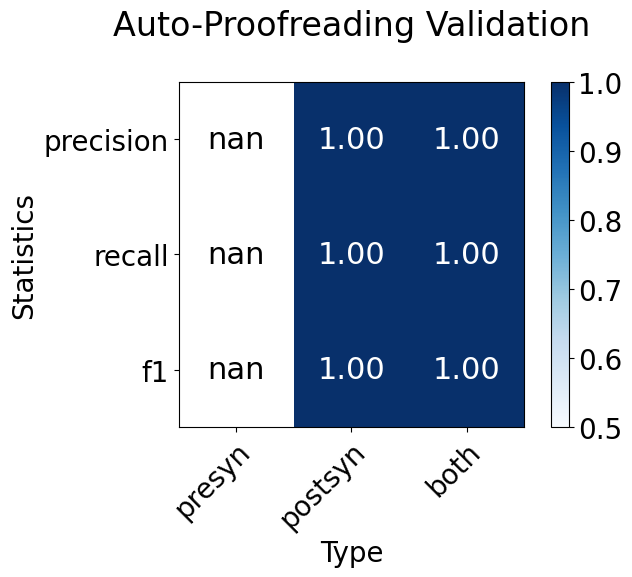

In [97]:
curr_validation_df = vu.synapse_validation_df_single_neuron(segment_id)
vu.synapse_validation_df_to_score_plot(curr_validation_df)

In [98]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Dont need spine recalculation
Number of Neurons found = 1


In [99]:
neuron_obj = neuron_objs[0]

In [100]:
neuron_obj.segment_id

864691135407289801

In [101]:
neuron_obj_with_web = au.complete_axon_processing(neuron_obj,
                                                 verbose=True)


Part 1: Axon like branchese 
{'L0': array([ 1,  7, 10, 11, 22, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 62, 63]), 'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12]), 'L4': array([ 1,  6,  7,  8,  9, 10]), 'L6': array([0])}
Limb L0 soma angle: 18.79 
Limb L1 soma angle: 164.18 
Limb L2 soma angle: 108.41 
Limb L3 soma angle: 99.46 
Limb L4 soma angle: 88.24 
Limb L5 soma angle: 56.03 
Limb L6 soma angle: 158.91 

Part 2: possible_axon_limbs = [1, 2, 3, 4, 6]

Phase 2: Working on Limb L1
nodes_to_eliminate = [16]

Phase 2: Working on Limb L2
nodes_to_eliminate = [7]

Phase 2: Working on Limb L3
nodes_to_eliminate = [0]

Phase 2: Working on Limb L4
nodes_to_eliminate = []

Phase 2: Working on Limb L6
nodes_to_eliminate = []

----Working on Limb L1-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L2-----
No endpoints were eliminated so don't need to add back any candidat

  0%|          | 0/1 [00:00<?, ?it/s]




 ---- Total time for applying filter: 2.9224750995635986 -----
Starting axon branch was the starting node so using border vertices and NOT computing upstream branch
upstream_node_to_axon_starting_branch = None
root_curr = [1295868.  530061.  833721.]
Time for preparing soma vertices and root: 0.0004405975341796875
invalidation_d = 2000
cc_vertex_thresh = 10


  0%|          | 0/1851 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 18.02it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.20183706283569336
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 231
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.21526741981506348
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.4557113647460938e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.8160552978515625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.0443418025970459
sbv[0].reshape(-1,3) = [[1295868.  530061.  833721.]]
closest_sk_pt_coord BEFORE = [1295794.71789855  530501.46686198  832820.91415581]
current_skeleton.shape = (230, 2, 3)
node_for_stitch = 14: [1295794.71789855  530501.46686198  832820.91415581]
node_for_stitch AFTER = 14: [1295794.71789855  530501.46686198  832820.91415581]
possible_node_loc = [0 5]
possible_node_loc AFTER = [0 5]
curr_shortest_path = [14, 11.0, 8.0, 5.0]
Current stitch point was not a branch or endpoint, 

  0%|          | 0/1 [00:00<?, ?it/s]

3618 3619
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Limb Correspondence before stitching = 1
Limb Correspondence AFTER stitching = 1
Upstream node was None so don't have to adjust
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7fe32c261c18>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1295746.11366268  530357.70676541  832584.81560598]---------
Starting_edge inside branches_to_conept = [[1295701.1683154   551050.2441675   840343.93793426]
 [1295746.11366268  530357.70676541  832584.81560598]]
Done generating concept network 




# Need way of finding the intersection and webbings of incorrect to correct branching

In [102]:
branch_attr = vu.neuron_to_border_branching_attributes(neuron_obj_with_web,
                                         plot_valid_border_branches=False,
                                          plot_invalid_border_branches = False,
                                          verbose=False
                                         )


Synapsse Results:
Total Number of Synapses = 3611
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 277
n_valid_syn_ids_postsyn = 3329
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3611
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 277
n_valid_syn_ids_postsyn = 3329
n_errored_syn_ids_postsyn = 5


0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [103]:
branch_attr

[]